In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from sqlalchemy import create_engine

In [108]:
trump_csv_path = "hashtag_donaldtrump.csv"
# biden_csv_path = "../hashtag_joebiden.csv"

In [109]:
trump_df = pd.read_csv(trump_csv_path, delimiter = ',', lineterminator='\n')
# biden_df = pd.read_csv(biden_csv_path, lineterminator='\n')

In [110]:
trump_df.head()


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [111]:
trump_data_df = trump_df[['created_at', 'tweet', 'likes', 'retweet_count', 'source','user_location', 'lat', 'long', 'city','state','state_code','country']]
trump_data_df.head()

,created_at,tweet,likes,retweet_count,source,user_location,lat,long,city,state,state_code,country
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,Florida,FL,United States of America
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,Portland,45.520247,-122.674195,Portland,Oregon,OR,United States of America
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,Washington DC,38.894992,-77.036558,Washington,District of Columbia,DC,United States of America


In [112]:
str_cols = ['user_location', 'city', 'state', 'state_code', 'country']
trump_data_df.loc[:, 'lat'] = trump_data_df.loc[:, 'lat'].fillna(91)
trump_data_df.loc[:, 'long'] = trump_data_df.loc[:, 'long'].fillna(181)
trump_data_df.loc[:, str_cols] = trump_data_df.loc[:, str_cols].fillna("Not Provided")
trump_data_df.head()

C:\Users\15037\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,created_at,tweet,likes,retweet_count,source,user_location,lat,long,city,state,state_code,country
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,Not Provided,Florida,FL,United States of America
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,Not Provided,91.000000,181.000000,Not Provided,Not Provided,Not Provided,Not Provided
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,Portland,45.520247,-122.674195,Portland,Oregon,OR,United States of America
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,Not Provided,91.000000,181.000000,Not Provided,Not Provided,Not Provided,Not Provided
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,Washington DC,38.894992,-77.036558,Washington,District of Columbia,DC,United States of America


In [113]:
trump_likes = trump_data_df['likes']
trump_retweet_count = trump_data_df['retweet_count']

In [115]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(trump_likes)
print(f"The mean number of hashtag trump tweet likes is {mean_numpy}")

median_numpy = np.median(trump_likes)
print(f"The median number of hashtag trump tweet likes is {median_numpy}")

mode_scipy = sts.mode(trump_likes)
print(f"The mode of hashtag trump tweet likes is {mode_scipy}")

The mean number of hashtag trump tweet likes is 7.4770109555997974
The median number of hashtag trump tweet likes is 0.0
The mode of hashtag trump tweet likes is ModeResult(mode=array([0.]), count=array([548581]))


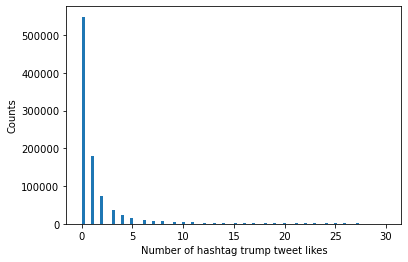

In [128]:
# Characterize the data set using matplotlib
plt.hist(trump_likes, bins=100, range = [0,30])
plt.xlabel('Number of hashtag trump tweet likes')
plt.ylabel('Counts')
plt.show()

In [130]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(trump_retweet_count)
print(f"The mean number of hashtag trump retweets is {mean_numpy}")

median_numpy = np.median(trump_retweet_count)
print(f"The median number of hashtag trump retweets is {median_numpy}")

mode_scipy = sts.mode(trump_retweet_count)
print(f"The mode of hashtag trump retweets is {mode_scipy}")

The mean number of hashtag trump retweets is 1.6985000808512347
The median number of hashtag trump retweets is 0.0
The mode of hashtag trump retweets is ModeResult(mode=array([0.]), count=array([780076]))


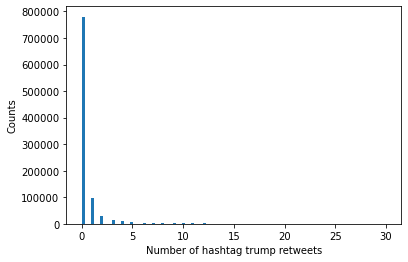

In [131]:
# Characterize the data set using matplotlib
plt.hist(trump_retweet_count, bins=100, range = [0,30])
plt.xlabel('Number of hashtag trump retweets')
plt.ylabel('Counts')
plt.show()

In [133]:
# Create a group based on the values in the 'source' column
source_group = trump_data_df.groupby('source')

# Count how many times each maker appears in our group
count_source = source_group['source'].count()

count_source

source
101soundboards      12
20secondes           1
24liveblog           1
24sante              1
2obyTweeder          2
                    ..
Оwly                33
はてな / Hatena         1
グランブルー ファンタジー        4
ツイタマ for Android     3
禁闻网                  3
Name: source, Length: 901, dtype: int64

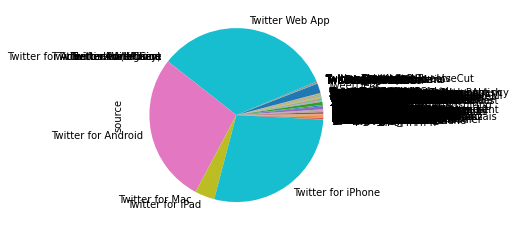

<Figure size 432x288 with 0 Axes>

In [136]:
# Create a pie chart based off of the group series from before
count_chart = count_source.plot(kind='pie')
plt.show()
plt.tight_layout()

In [137]:
# Create a group based on the values in the 'source' column
country_group = trump_data_df.groupby('country')

# Count how many times each maker appears in our group
count_country = country_group['country'].count()

count_country

country
Afghanistan     101
Albania          74
Algeria          49
Angola           50
Anguilla          3
               ... 
Venezuela      2594
Vietnam         139
Yemen            93
Zambia           38
Zimbabwe         60
Name: country, Length: 186, dtype: int64

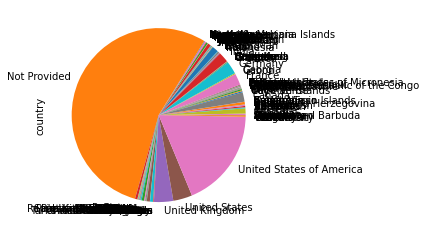

<Figure size 432x288 with 0 Axes>

In [138]:
# Create a pie chart based off of the group series from before
count_chart = count_country.plot(kind='pie')
plt.show()
plt.tight_layout()

In [ ]:
# Create a pie chart based off of the group series from before
count_chart = count_country.plot(kind='pie')
plt.show()
plt.tight_layout()

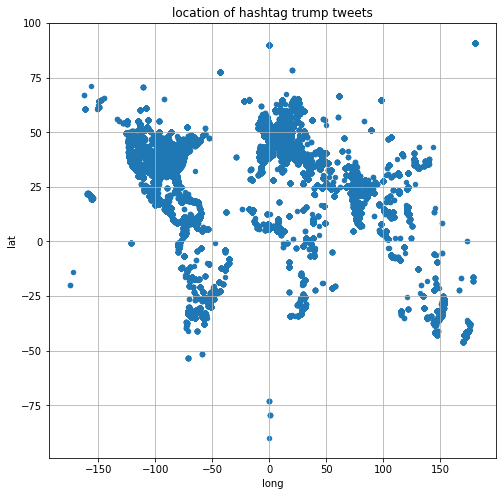

In [140]:
test = trump_data_df.plot(kind="scatter", x="long", y="lat", grid=True, figsize=(8,8),
              title="location of hashtag trump tweets")

In [178]:
# using naive method to get count  
# counting #'s
trump_tweets = trump_data_df['tweet']
hashtag_count = []

for tweet in trump_tweets:
    
    count = 0
  
    for i in tweet: 
        if i == '#': 
            count = count + 1
    hashtag_count.append(count)
        
hashtag_count

[8,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 3,
 9,
 6,
 15,
 3,
 10,
 7,
 3,
 5,
 1,
 3,
 24,
 7,
 1,
 19,
 4,
 5,
 2,
 11,
 4,
 4,
 2,
 10,
 3,
 5,
 7,
 2,
 6,
 2,
 8,
 1,
 1,
 3,
 2,
 2,
 4,
 17,
 2,
 2,
 1,
 7,
 2,
 1,
 5,
 11,
 11,
 9,
 11,
 1,
 11,
 3,
 6,
 2,
 2,
 8,
 3,
 9,
 1,
 3,
 12,
 3,
 7,
 2,
 1,
 1,
 9,
 1,
 1,
 11,
 1,
 13,
 11,
 7,
 10,
 3,
 6,
 4,
 11,
 4,
 2,
 2,
 1,
 9,
 4,
 5,
 9,
 32,
 3,
 3,
 8,
 3,
 12,
 11,
 11,
 2,
 3,
 2,
 1,
 5,
 3,
 3,
 2,
 2,
 1,
 4,
 9,
 5,
 3,
 7,
 10,
 17,
 3,
 1,
 8,
 2,
 1,
 1,
 3,
 12,
 3,
 6,
 3,
 1,
 2,
 2,
 1,
 3,
 3,
 17,
 2,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 16,
 11,
 1,
 9,
 9,
 1,
 9,
 2,
 2,
 4,
 4,
 2,
 1,
 9,
 12,
 2,
 2,
 5,
 2,
 5,
 2,
 2,
 3,
 2,
 1,
 8,
 1,
 2,
 1,
 16,
 9,
 4,
 1,
 2,
 2,
 4,
 1,
 1,
 11,
 3,
 1,
 5,
 2,
 6,
 12,
 2,
 3,
 5,
 1,
 1,
 9,
 1,
 3,
 4,
 1,
 4,
 13,
 1,
 13,
 1,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 1,
 11,
 5,
 1,
 7,
 1,
 3,
 7,
 1,
 11,
 2,
 6,
 7,
 1,
 2,
 17,
 4,
 1,
 3,
 1,
 5,
 18,
 1,
 13,
 8,
 2,
 8

In [179]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(hashtag_count)
print(f"The mean number of hashtags in a tweet is {mean_numpy}")

median_numpy = np.median(hashtag_count)
print(f"The median number of hashtags in a tweet is {median_numpy}")

mode_scipy = sts.mode(hashtag_count)
print(f"The mode of hashtags in a tweet is {mode_scipy}")

The mean number of hashtags in a tweet is 4.170502379704177
The median number of hashtags in a tweet is 3.0
The mode of hashtags in a tweet is ModeResult(mode=array([2]), count=array([195119]))


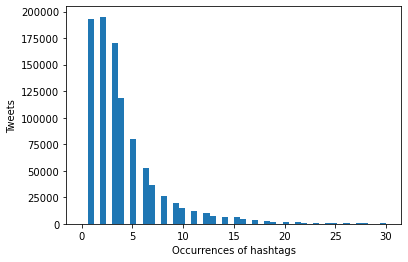

In [180]:
# Characterize the data set using matplotlib
plt.hist(hashtag_count, bins=50, range = [0,30])
plt.xlabel('Occurrences of hashtags')
plt.ylabel('Tweets')
plt.show()

In [181]:
d = {"hashtag_count" : hashtag_count, "likes" : trump_likes}
df = pd.DataFrame(d)
df

,hashtag_count,likes
0,8,0.0
1,1,26.0
2,1,2.0
3,1,0.0
4,2,4.0
...,...,...
970914,1,0.0
970915,1,4.0
970916,2,25.0
970917,1,0.0


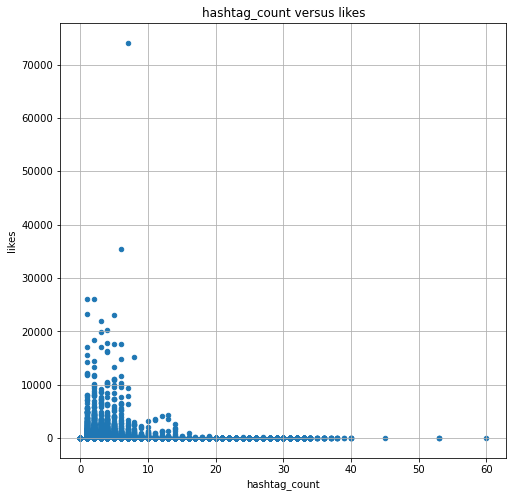

In [182]:
test = df.plot(kind="scatter", x="hashtag_count", y="likes", grid=True, figsize=(8,8),
              title="hashtag_count versus likes")

In [155]:
d = {"hashtag_count" : hashtag_count, "retweet_count" : trump_retweet_count}
df = pd.DataFrame(d)
df

,hashtag_count,retweet_count
0,8,0.0
1,1,9.0
2,1,1.0
3,1,0.0
4,2,3.0
...,...,...
970914,1,0.0
970915,1,0.0
970916,2,4.0
970917,1,0.0


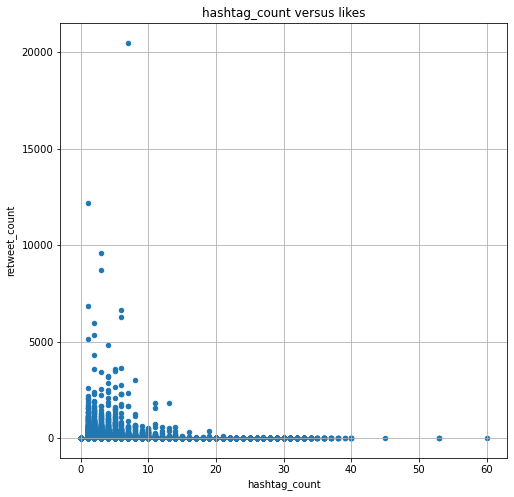

In [156]:
test = df.plot(kind="scatter", x="hashtag_count", y="retweet_count", grid=True, figsize=(8,8),
              title="hashtag_count versus likes")

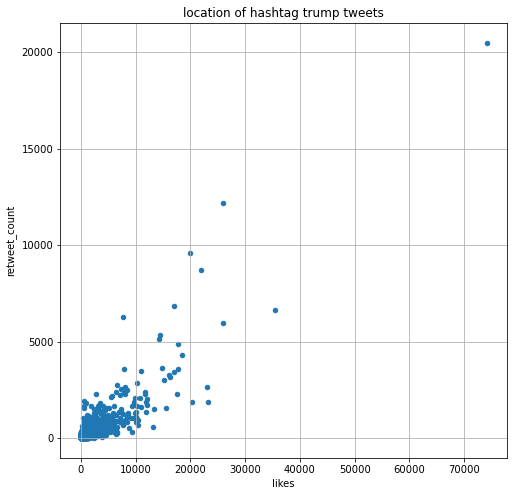

In [157]:
test = trump_data_df.plot(kind="scatter", x="likes", y="retweet_count", grid=True, figsize=(8,8),
              title="location of hashtag trump tweets")

In [82]:
trump_data_df.isnull().values.sum()

3938925

In [83]:
trump_null= trump_data_df[trump_data_df.isna().any(axis=1)]
trump_null

,created_at,tweet,likes,retweet_count,source,user_location,lat,long,city,state,state_code,country
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,Florida,FL,United States of America
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,Twitter for Android,"Perris,California",33.782519,-117.228648,NaN,California,CA,United States of America
6,2020-10-15 00:00:17,@richardmarx Glad u got out of the house! DICK...,0.0,0.0,Twitter for iPhone,"Powell, TN",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
970914,2020-11-08 23:59:43,@PelleX @Mikerger @spiegelbilderz_ @BertiFranz...,0.0,0.0,Twitter Web App,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970915,2020-11-08 23:59:48,JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...,4.0,0.0,Twitter Web App,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970916,2020-11-08 23:59:53,#AfD|ler reagieren panisch bis hysterisch auf ...,25.0,4.0,Twitter Web App,Saxony/GER,NaN,NaN,NaN,NaN,NaN,NaN
970917,2020-11-08 23:59:54,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
def isNaN(num):
    return num != num

trump_data_df.loc[:,['lat', 'long'].fillna(91)

SyntaxError: unexpected EOF while parsing (<ipython-input-85-0c71e2caf8cf>, line 4)

In [71]:
columns = ['created_at', 'tweet', 'likes', 'retweet_count', 'source','user_location', 'lat', 'long', 'city','state','state_code','country']

for row in range(len(trump_data_df)):
     for col in columns:
        num = trump_data_df.loc[row,col]
        if isNaN(num) == 1:
            trump_data_df.at[row,col] = 0

In [72]:
trump_data_df.head()

,created_at,tweet,likes,retweet_count,source,user_location,lat,long,city,state,state_code,country
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,0,Florida,FL,United States of America
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,0,0.000000,0.000000,0,0,0,0
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,Portland,45.520247,-122.674195,Portland,Oregon,OR,United States of America
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,0,0.000000,0.000000,0,0,0,0
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,Washington DC,38.894992,-77.036558,Washington,District of Columbia,DC,United States of America


In [ ]:
all_dfs = [df1, 
pd.concat(all_dfs).reset_index(drop=True)